In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [2]:
# loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

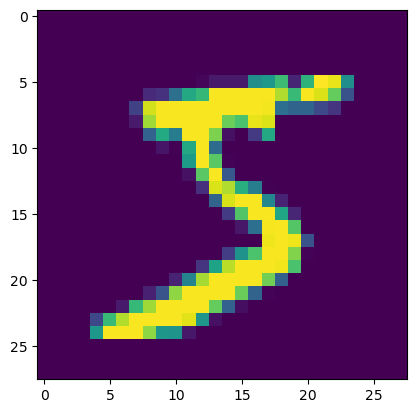

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

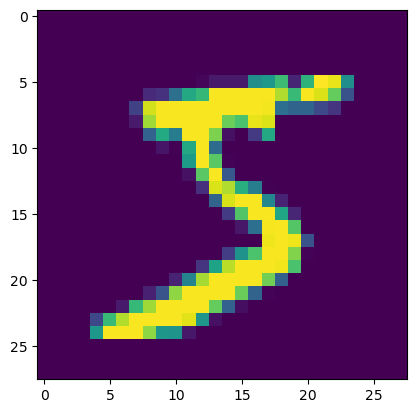

In [9]:
# we will rescale the data to have values between 0 and 1 by dividing with 255.0
x_train=x_train/255.0
x_test=x_test/255.0
plt.imshow(x_train[0])

In [11]:
# now lets create sparse matrix from y_train and y_test
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [12]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## lets reshape the data

In [13]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', x_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [14]:
# we can also use following method to add channel dimention for gray scale images
# x = x_train[..., tf.newaxis]

## models

In [84]:
# first CNN architecture
# simple architecture with 1 conv layer (32 kernels) 1 max pooling layer and 2 fully connected layers
def cnn_model_1():
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Define the second CNN architecture
# simple architecture with 2 conv layer (16 kernels and 32 kernels)  2 max pooling layer and 2 fully connected layers
def cnn_model_2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(14, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Define the third CNN architecture
# 3 alternate conv and max pooling layes with kernels 8, 16, 32 respectively followed by 2 FC layers
def cnn_model_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model
 

In [85]:
print(cnn_model_1().count_params())
print(cnn_model_2().count_params())
print(cnn_model_3().count_params())

7834
7986
7442


#### number of trainable paramter are minimum for model-2

In [92]:
cnn_model_1().summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 13, 13, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_157 (Conv2D)         (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 5, 5, 16)         0         
 ng2D)                                                           
                                                                 
 flatten_73 (Flatten)        (None, 400)               0         
                                                                 
 dense_146 (Dense)           (None, 16)              

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

## compile model

In [87]:
# Compile and train the model
def train_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Apply early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop])
    
    # Evaluate the model on the test set
    _, accuracy = model.evaluate(x_test, y_test)
    params_count = model.count_params()
    
    return accuracy, params_count, history

In [88]:
# Train and evaluate model 1
model_1 = cnn_model_1()
accuracy_1, params_count_1, history_1 = train_model(model_1)

# Train and evaluate model 2
model_2 = cnn_model_2()
accuracy_2, params_count_2, history_2 = train_model(model_2)

# Train and evaluate model 3
model_3 = cnn_model_3()
accuracy_3, params_count,history_3 = train_model(model_3)

Epoch 1/20
938/938 [==============================] - 21s 21ms/step - loss: 0.3535 - accuracy: 0.8933 - val_loss: 0.1099 - val_accuracy: 0.9674
Epoch 2/20
938/938 [==============================] - 19s 20ms/step - loss: 0.1065 - accuracy: 0.9682 - val_loss: 0.0860 - val_accuracy: 0.9730
Epoch 3/20
938/938 [==============================] - 21s 22ms/step - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.0702 - val_accuracy: 0.9765
Epoch 4/20
938/938 [==============================] - 22s 23ms/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0550 - val_accuracy: 0.9824
Epoch 5/20
938/938 [==============================] - 23s 24ms/step - loss: 0.0594 - accuracy: 0.9823 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 6/20
938/938 [==============================] - 22s 23ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0544 - val_accuracy: 0.9827
Epoch 7/20
938/938 [==============================] - 22s 24ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0462 - val_accuracy:

In [89]:
print(accuracy_1)
print(accuracy_2)
print(accuracy_3)

0.9883000254631042
0.987500011920929
0.9896000027656555


#### model 2 gives good accuracy with less number of trainable parameters

[]

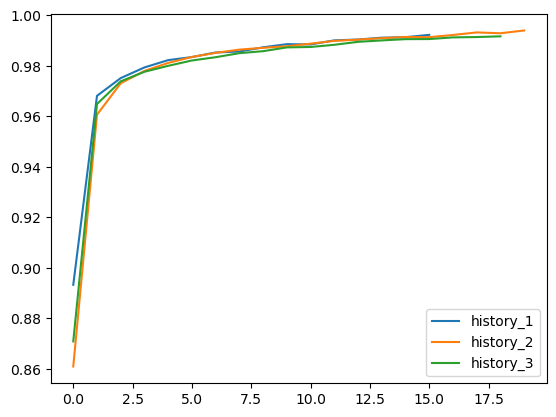

In [90]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_2.history['accuracy'])
plt.plot(history_3.history['accuracy'])
plt.legend(['history_1','history_2','history_3'],loc='lower right')
plt.plot()

[]

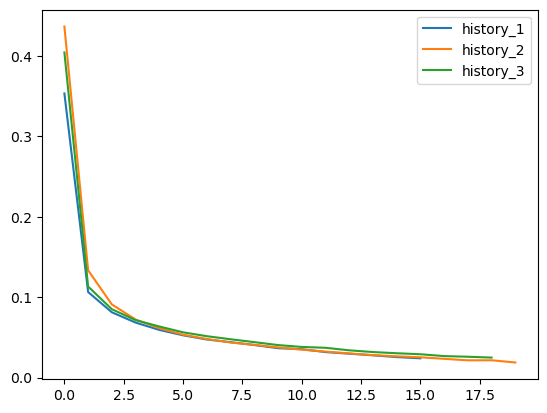

In [91]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.legend(['history_1','history_2','history_3'],loc='upper right')
plt.plot()